In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

## df1 - Earning/ Hours worked in Construction in Ireland

In [2]:
#JSON file format

#!conda install pyjstat
!pip install pyjstat

In [3]:
from pyjstat import pyjstat

request_url = 'https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/BDA01/JSON-stat/2.0/en'
# read json data
dataset = pyjstat.Dataset.read(request_url)

# write to pandas dataframe
df1 = dataset.write('dataframe')

In [4]:
df1.head()

,Type of Worker,Year,Statistic,value
0,All manual employee grades,1969,Average Earnings per Hour in the Building and ...,NaN
1,All manual employee grades,1969,Average Earnings per Week in the Building and ...,NaN
2,All manual employee grades,1969,Average Hours Worked per Week in the Building ...,NaN
3,All manual employee grades,1970,Average Earnings per Hour in the Building and ...,NaN
4,All manual employee grades,1970,Average Earnings per Week in the Building and ...,NaN


In [5]:
#To determine the variables in the statistic column.

df1label = df1.groupby(by=['Statistic']).size()
print(df1label)

Statistic
Average Earnings per Hour in the Building and Construction Industry        360
Average Earnings per Week in the Building and Construction Industry        360
Average Hours Worked per Week in the Building and Construction Industry    360
dtype: int64


In [6]:
df1 = df1.rename(columns={'Type of Worker': 'Type_of_Worker'})

In [7]:
df1label = df1.groupby(by=['Type_of_Worker']).size()
print(df1label)

Type_of_Worker
All employees (clerical and operatives)    120
All manual employee grades                 120
Apprentices                                120
Clerical employees - female                120
Clerical employees - male                  120
Foremen and supervisors                    120
Skilled operatives                         120
Unskilled and semi-skilled - adults        120
Unskilled and semi-skilled - juveniles     120
dtype: int64


In [8]:
##Dropping the Average weekly earning rows from the dataframe as it already contains hours worked and hourly rate.

df1C = df1.drop(df1[df1["Statistic"]=="Average Earnings per Week in the Building and Construction Industry"].index)

In [9]:
df1C.head()

,Type_of_Worker,Year,Statistic,value
0,All manual employee grades,1969,Average Earnings per Hour in the Building and ...,NaN
2,All manual employee grades,1969,Average Hours Worked per Week in the Building ...,NaN
3,All manual employee grades,1970,Average Earnings per Hour in the Building and ...,NaN
5,All manual employee grades,1970,Average Hours Worked per Week in the Building ...,NaN
6,All manual employee grades,1971,Average Earnings per Hour in the Building and ...,NaN


In [10]:
df1C.dtypes

Type_of_Worker     object
Year               object
Statistic          object
value             float64
dtype: object

In [11]:
#Count the number of null values.

df1null = df1C.isnull().sum()

In [12]:
df1null

##High number of NaN values in the value column. 

Type_of_Worker      0
Year                0
Statistic           0
value             238
dtype: int64

## df2 Production Index for Construction Europe

In [31]:
#reverts to the tab - file is .tsv#
#The pipe (|) allows multiple seperators 
#\t seperating tabs and ',' seperating commas as are in the column 1 

df2=pd.read_csv("Production_Europe.tsv",sep="\t|,", engine='python')

#### Default parser for read csv does not support seperators greater than one character. Specifying engine=python above so multiple seperators can be used. Required as file as file contains tab and comma delimiters.  

In [32]:
df2.head()

,indic_bt,nace_r2,s_adj,unit,geo\time,2022,2021,2020,2019,2018,...,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,PROD,B-D_F,CA,I15,AT,128.4,120.7,109.3,115.7,114.2,...,:,:,:,:,:,:,:,:,:,:
1,PROD,B-D_F,CA,I15,BE,121.0 s,121.4 s,106.2 s,111.4 s,107.4 s,...,:,:,:,:,:,:,:,:,:,:
2,PROD,B-D_F,CA,I15,BG,119.5 s,107.5 s,98.6 s,105.1 s,104.0 s,...,:,:,:,:,:,:,:,:,:,:
3,PROD,B-D_F,CA,I15,CH,124.6,119.2,110.5,114.2,110.4,...,:,:,:,:,:,:,:,:,:,:
4,PROD,B-D_F,CA,I15,CY,148.6 s,150.5 s,142.3 s,153.1 s,142.9 s,...,:,:,:,:,:,:,:,:,:,:


In [33]:
#Dropping unuseful columns.

df2=df2.drop(["indic_bt", "nace_r2", "s_adj"], axis=1)

In [34]:
#Want to keep unit and geo\time columns the same. Melt the rest of the year columns

df2=pd.melt(df2, id_vars=["unit","geo\\time"], var_name="Year",
          value_name="Production")

In [35]:
#Replacing everything that isn't a number 0 to 9, or a decimal point.
#Revisit.

df2['Production'] = df2['Production'].str.replace('[^0-9.]+', '', regex=True)

#Ref - https://copyprogramming.com/howto/python-pandas-how-to-remove-non-numeric-characters-from-multiple-columns

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26144 entries, 0 to 26143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   unit        26144 non-null  object
 1   geo\time    26144 non-null  object
 2   Year        26144 non-null  object
 3   Production  26144 non-null  object
dtypes: object(4)
memory usage: 817.1+ KB


In [37]:
df2.astype("object").describe()

,unit,geo\time,Year,Production
count,26144,26144,26144,26144
unique,3,40,43,1970
top,I15,AT,2022,
freq,11524,774,608,13146


In [38]:
df2.dtypes

unit          object
geo\time      object
Year          object
Production    object
dtype: object

In [39]:
#When you melt a numerical column it turns to an object/string and you need to change back to integer. 

df2[["Year","Production"]]=df2[["Year","Production"]].apply(pd.to_numeric)

#Insert Geeks for Geeks ref.

In [40]:
df2.dtypes

unit           object
geo\time       object
Year            int64
Production    float64
dtype: object

In [41]:
import numpy as np

#Need to remove all white space to address the unavailable values.
df2 = df2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#Replace the ':' vale with NaN. 
df2 = df2.replace(':', np.nan)

#Ref - https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha

In [42]:
df2

,unit,geo\time,Year,Production
0,I15,AT,2022,128.4
1,I15,BE,2022,121.0
2,I15,BG,2022,119.5
3,I15,CH,2022,124.6
4,I15,CY,2022,148.6
...,...,...,...,...
26139,I15,SE,1980,NaN
26140,I15,SI,1980,NaN
26141,I15,SK,1980,NaN
26142,I15,TR,1980,NaN


[Text(0.5, 0, 'Production'),
 Text(0, 0.5, 'Production'),
 Text(0.5, 1.0, 'Production Histogram')]

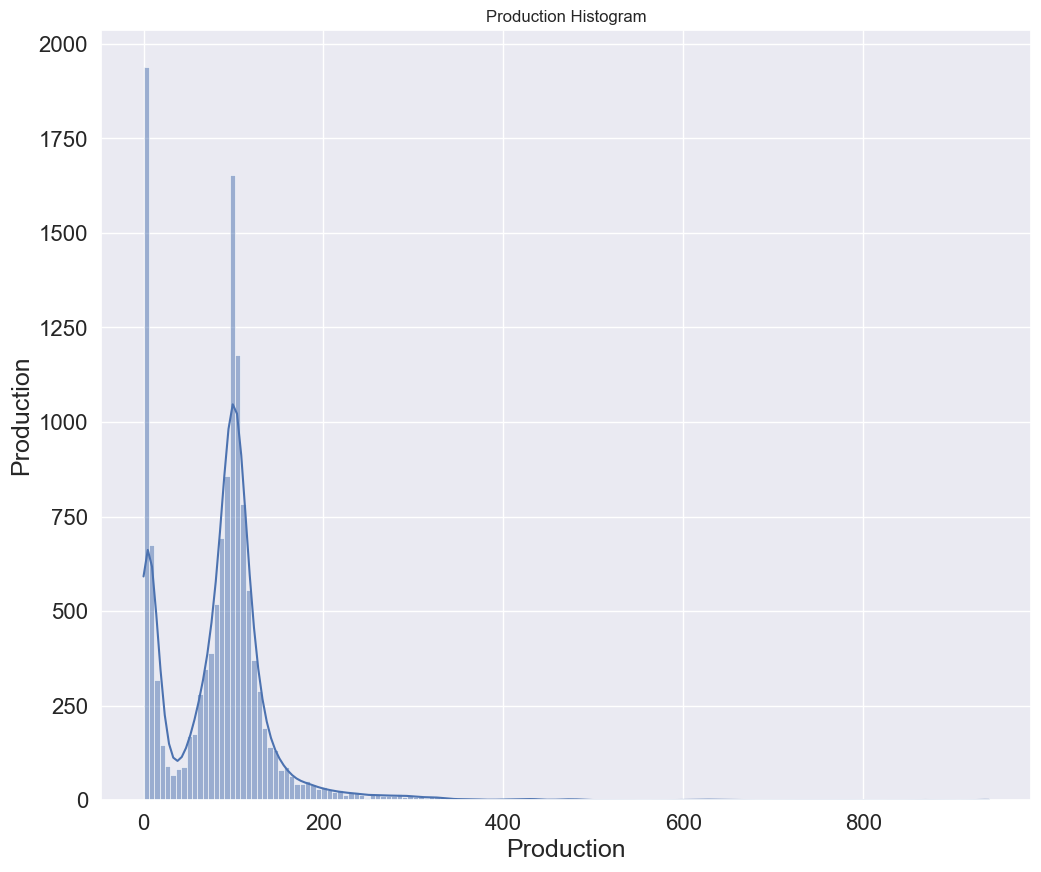

In [43]:
ax = sns.histplot(df2.Production, kde=True)
ax.set(xlabel='Production', ylabel='Production', title ='Production Histogram')

In [44]:
df2.dropna(inplace=True)

In [45]:
df2

,unit,geo\time,Year,Production
0,I15,AT,2022,128.4
1,I15,BE,2022,121.0
2,I15,BG,2022,119.5
3,I15,CH,2022,124.6
4,I15,CY,2022,148.6
...,...,...,...,...
24338,I15,IE,1982,7.9
24370,PCH_SM,IE,1982,0.0
24946,I15,IE,1981,7.9
24978,PCH_SM,IE,1981,5.3


In [46]:
df2label = df2.groupby(by=['geo\\time']).size()
print(df2label)

geo\time
AL            65
AT           452
BA            79
BE           380
BG           380
CH           380
CY           374
CZ           380
DE           542
DK           380
EA19         267
EA20         200
EE           370
EL           374
ES           306
EU27_2020    208
EU28         191
FI           464
FR           560
HR           384
HU           380
IE           391
IT           222
LT           416
LU           172
LV           380
ME           312
MK           211
MT           172
NL           172
NO           387
PL           380
PT           380
RO           368
RS           104
SE           470
SI           384
SK           380
TR           171
UK           410
dtype: int64


[Text(0.5, 0, 'Production'),
 Text(0, 0.5, 'Production'),
 Text(0.5, 1.0, 'Production Histogram')]

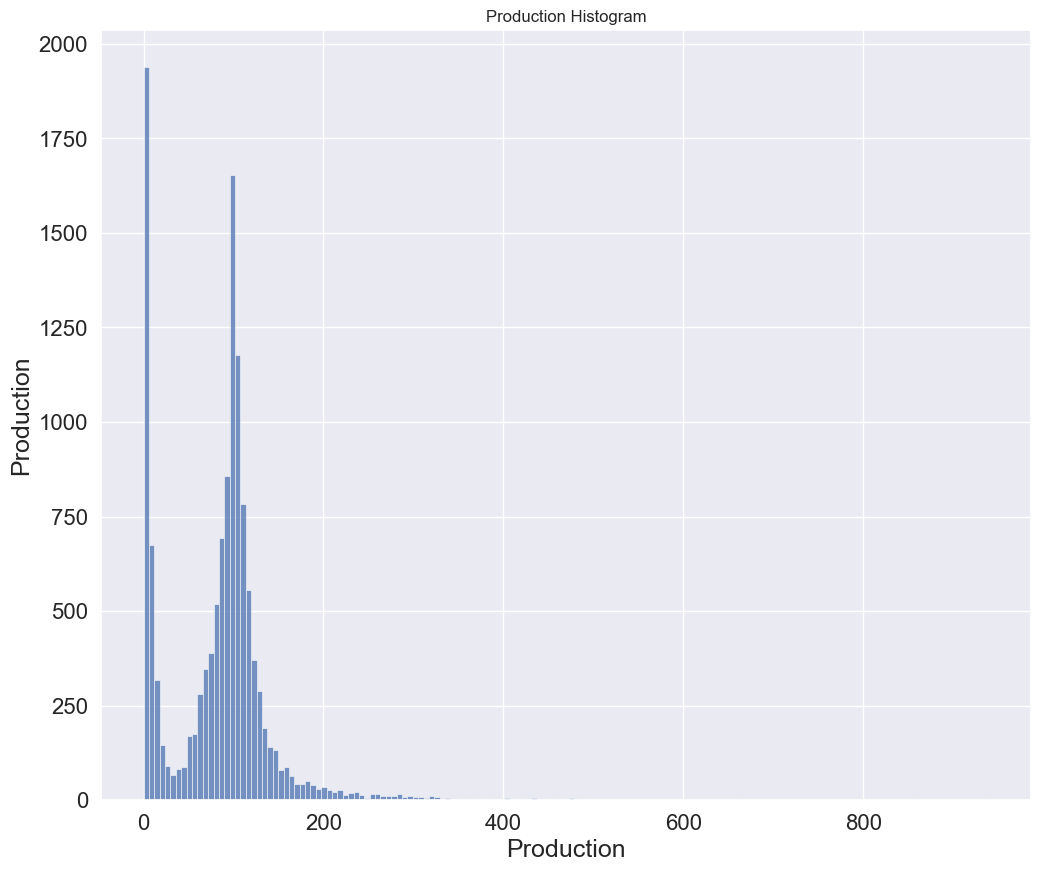

In [47]:
#Determine whether dropping the NaN values affects the distribution of the data

ax = sns.histplot(df2.Production)
ax.set(xlabel='Production', ylabel='Production', title ='Production Histogram')

Text(0.5, 1.0, 'Boxplot of Production Index Europe')

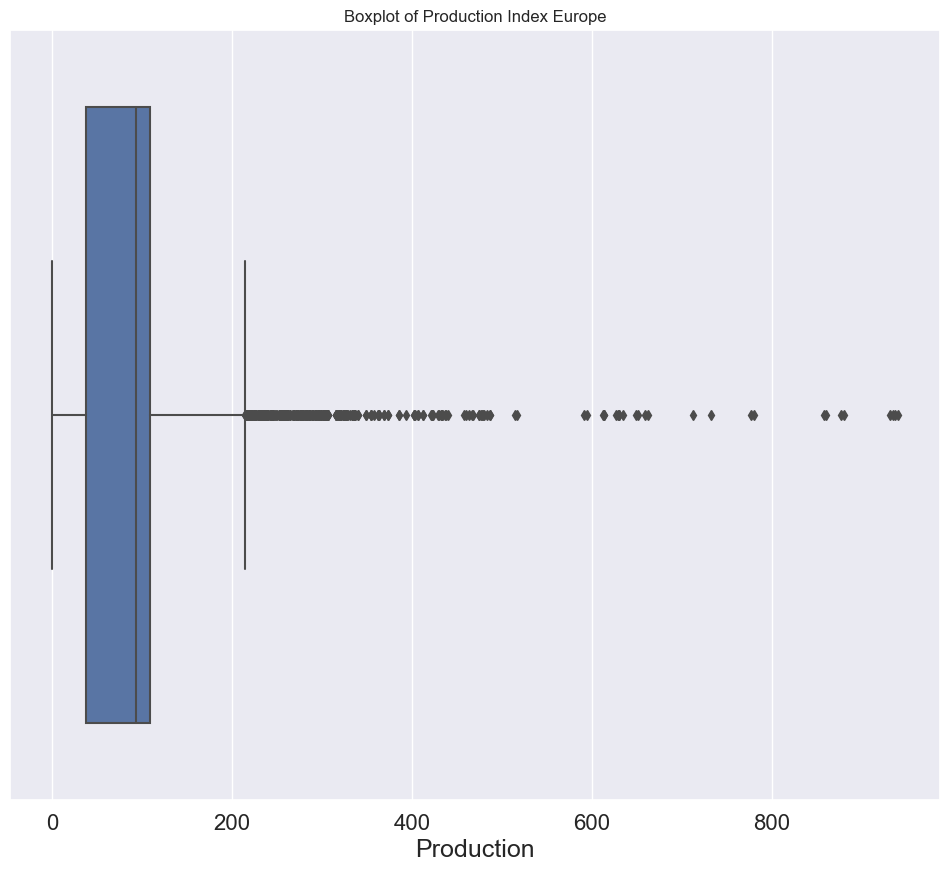

In [48]:
sns.boxplot(x=df2["Production"])
plt.title("Boxplot of Production Index Europe")

## df3 House Construction C.I Ireland 

In [50]:
df3=pd.read_csv("national_house_construction_cost_index_0.csv")

In [51]:
df3.head()

,Unnamed: 0,NATIONAL HOUSE CONSTRUCTION COST INDEX,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Base: January 1991 = 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
2,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
3,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
4,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN


In [52]:
#Setting the first row of the table to column 2.

df3=pd.read_csv("national_house_construction_cost_index_0.csv", header=2)

In [53]:
df3.head()

,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN


In [54]:
df3.columns

Index(['Month', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [55]:
df3_new = pd.melt(df3, id_vars='Month', var_name='Year', value_name='Value')

In [56]:
df3_new

,Month,Year,Value
0,January,1994,109.2
1,February,1994,109.3
2,March,1994,109.4
3,April,1994,110.3
4,May,1994,110.1
...,...,...,...
317,October,2016,NaN
318,November,2016,NaN
319,December,2016,NaN
320,Yearly average,2016,NaN


In [57]:
df3.dtypes

Month     object
1994      object
1995      object
1996      object
1997      object
1998      object
1999      object
2000      object
2001      object
2002      object
2003      object
2004      object
2005      object
2006      object
2007      object
2008      object
2009      object
2010      object
2011      object
2012      object
2013      object
2014      object
2015      object
2016     float64
dtype: object

In [58]:
df3_transposed = df3.set_index('Month').T

In [59]:
df3_transposed

Month,January,February,March,April,May,June,July,August,September,October,November,December,Yearly average,% Increase on previous year
1994,109.2,109.3,109.4,110.3,110.1,110.6,110.7,110.9,112.2,112.7,112.9,113.1,111,3.40%
1995,113.5,114.1,114.1,114.1,114.1,114.1,114.5,114.5,115.7,115.8,115.9,115.9,114.7,3.30%
1996,115.9,115.7,115.9,115.9,115.9,116,116,116,116.9,117.1,117.2,117.2,116.3,1.40%
1997,118,118.5,118.8,119.8,119.8,119.9,120.8,121,121.5,122,122.6,122.6,120.4,3.50%
1998,122.9,123.1,123.8,123.8,124.5,124.5,125.7,125.7,126,126.2,126.2,126.1,124.9,3.70%
1999,126.3,126.4,126.5,130.5,130.5,130.5,131.5,131.5,134.1,134.7,134.8,134.9,131,4.90%
2000,135.8,136.1,136.4,136.5,136.8,136.9,137.2,137.2,137.7,153.8,153.8,153.9,141,7.60%
2001,154.3,154.7,155.6,157.4,157.6,157.7,161.1,165.9,166,169.3,169.4,169.3,161.5,14.50%
2002,169.9,170,169.5,169.5,169.5,169.7,173.8,173.9,173.9,173.9,174,174.1,171.8,6.40%
2003,174.2,174.5,174.5,177.3,177.3,177.4,177.1,177.2,177.2,177.2,177.2,177.2,176.5,2.70%


In [60]:
#Number of NaN values for 2016. Data only present for January. Drop the row

df3_transposed=df3_transposed.drop(["2016"], axis=0)

In [61]:
df3_transposed.reset_index(inplace=True)

In [62]:
df3_new = df3_transposed.iloc[:,: -2]

# Use the melt function to reshape the DataFrame
df3_new = pd.melt(df3_transposed, id_vars='index', var_name='Month', value_name='Value', value_vars=df3_transposed.columns[:-2])

# Rename the columns
df3_new.rename(columns={'index': 'Year'}, inplace=True)

# Sort the DataFrame by Year and Month
df3_new.sort_values(['Year', 'Month'], inplace=True)

In [63]:
df3_new

,Year,Month,Value
66,1994,April,110.3
154,1994,August,110.9
242,1994,December,113.1
22,1994,February,109.3
0,1994,January,109.2
...,...,...,...
65,2015,March,206.5
109,2015,May,207.2
241,2015,November,207.6
219,2015,October,207.2


In [64]:
df3_new['Statistic Label'] = 'House Construction Cost Index'

df3_new.rename(columns={'Value':'VALUE'}, inplace=True)

In [65]:
df3_new

,Year,Month,VALUE,Statistic Label
66,1994,April,110.3,House Construction Cost Index
154,1994,August,110.9,House Construction Cost Index
242,1994,December,113.1,House Construction Cost Index
22,1994,February,109.3,House Construction Cost Index
0,1994,January,109.2,House Construction Cost Index
...,...,...,...,...
65,2015,March,206.5,House Construction Cost Index
109,2015,May,207.2,House Construction Cost Index
241,2015,November,207.6,House Construction Cost Index
219,2015,October,207.2,House Construction Cost Index


## df4 Residential Property Price Index Ireland 

In [66]:
df4=pd.read_csv("Residential_Prop_Price_Index.csv")

In [67]:
df4.head()

,Statistic Label,Month,Type of Residential Property,UNIT,VALUE
0,Residential Property Price Index,2005 January,National - all residential properties,Base 2015=100,124.9
1,Residential Property Price Index,2005 January,National - houses,Base 2015=100,120.7
2,Residential Property Price Index,2005 January,National - apartments,Base 2015=100,153.4
3,Residential Property Price Index,2005 January,Dublin - all residential properties,Base 2015=100,118.5
4,Residential Property Price Index,2005 January,Dublin - houses,Base 2015=100,112.0


Just want the values for National. Do not want the individual areas as results in unnecessary complication.

In [68]:
df4=df4.rename(columns={"Type of Residential Property": "Type_of_Residential_Property"})

In [69]:
df4

,Statistic Label,Month,Type_of_Residential_Property,UNIT,VALUE
0,Residential Property Price Index,2005 January,National - all residential properties,Base 2015=100,124.9
1,Residential Property Price Index,2005 January,National - houses,Base 2015=100,120.7
2,Residential Property Price Index,2005 January,National - apartments,Base 2015=100,153.4
3,Residential Property Price Index,2005 January,Dublin - all residential properties,Base 2015=100,118.5
4,Residential Property Price Index,2005 January,Dublin - houses,Base 2015=100,112.0
...,...,...,...,...,...
17435,Percentage Change over 12 months for Residenti...,2023 February,West - houses,%,8.1
17436,Percentage Change over 12 months for Residenti...,2023 February,Mid-East - houses,%,6.7
17437,Percentage Change over 12 months for Residenti...,2023 February,Mid-West - houses,%,4.9
17438,Percentage Change over 12 months for Residenti...,2023 February,South-East - houses,%,5.7


In [271]:
keep = ["National -"]

# Drop rows that do not contain any of the strings in 'keep'
# .strip() removes whitespace
df4 = df4[df4['Type_of_Residential_Property'].str.strip().str.contains('|'.join(keep))]

##Ref - https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/

In [272]:
df4.head()

,Statistic Label,Month,Type_of_Residential_Property,UNIT,VALUE
0,Residential Property Price Index,2005 January,National - all residential properties,Base 2015=100,124.9
1,Residential Property Price Index,2005 January,National - houses,Base 2015=100,120.7
2,Residential Property Price Index,2005 January,National - apartments,Base 2015=100,153.4
20,Residential Property Price Index,2005 February,National - all residential properties,Base 2015=100,125.9
21,Residential Property Price Index,2005 February,National - houses,Base 2015=100,121.8


In [273]:
df4label = df4.groupby(by=['Statistic Label']).size()
print(df4label)

Statistic Label
Percentage Change over 1 month for Residential Property Price Index      654
Percentage Change over 12 months for Residential Property Price Index    654
Percentage Change over 3 months for Residential Property Price Index     654
Residential Property Price Index                                         654
dtype: int64


Only interested in the Residential Property Price Index for the purpose of this assignment. 

In [274]:
df4_filt = df4[df4['Statistic Label'] == 'Residential Property Price Index']

In [275]:
df4_filt.head()

,Statistic Label,Month,Type_of_Residential_Property,UNIT,VALUE
0,Residential Property Price Index,2005 January,National - all residential properties,Base 2015=100,124.9
1,Residential Property Price Index,2005 January,National - houses,Base 2015=100,120.7
2,Residential Property Price Index,2005 January,National - apartments,Base 2015=100,153.4
20,Residential Property Price Index,2005 February,National - all residential properties,Base 2015=100,125.9
21,Residential Property Price Index,2005 February,National - houses,Base 2015=100,121.8


In [276]:
df4_filt.dtypes

Statistic Label                  object
Month                            object
Type_of_Residential_Property     object
UNIT                             object
VALUE                           float64
dtype: object

In [277]:
date = df4_filt['Month'].str.split(pat = ' ', n = 1, expand = True)

In [278]:
date = date.rename(columns={' 0': 'Year', ' 1': 'Month'})

In [279]:
date

,0,1
0,2005,January
1,2005,January
2,2005,January
20,2005,February
21,2005,February
...,...,...
4321,2023,January
4322,2023,January
4340,2023,February
4341,2023,February


In [280]:
df4_filt.head()

,Statistic Label,Month,Type_of_Residential_Property,UNIT,VALUE
0,Residential Property Price Index,2005 January,National - all residential properties,Base 2015=100,124.9
1,Residential Property Price Index,2005 January,National - houses,Base 2015=100,120.7
2,Residential Property Price Index,2005 January,National - apartments,Base 2015=100,153.4
20,Residential Property Price Index,2005 February,National - all residential properties,Base 2015=100,125.9
21,Residential Property Price Index,2005 February,National - houses,Base 2015=100,121.8


In [281]:
df4_filt = df4_filt.drop('Month', axis=1)

In [282]:
df4_filt.insert(loc = 3, column = 'Year', value = date[0])


df4_filt.insert(loc = 4, column = 'Month', value = date[1])

In [283]:
df4_filt.columns

Index(['Statistic Label', 'Type_of_Residential_Property', 'UNIT', 'Year',
       'Month', 'VALUE'],
      dtype='object')

In [284]:
df4_filt 

,Statistic Label,Type_of_Residential_Property,UNIT,Year,Month,VALUE
0,Residential Property Price Index,National - all residential properties,Base 2015=100,2005,January,124.9
1,Residential Property Price Index,National - houses,Base 2015=100,2005,January,120.7
2,Residential Property Price Index,National - apartments,Base 2015=100,2005,January,153.4
20,Residential Property Price Index,National - all residential properties,Base 2015=100,2005,February,125.9
21,Residential Property Price Index,National - houses,Base 2015=100,2005,February,121.8
...,...,...,...,...,...,...
4321,Residential Property Price Index,National - houses,Base 2015=100,2023,January,168.2
4322,Residential Property Price Index,National - apartments,Base 2015=100,2023,January,166.6
4340,Residential Property Price Index,National - all residential properties,Base 2015=100,2023,February,167.1
4341,Residential Property Price Index,National - houses,Base 2015=100,2023,February,167.5


## df3 & df4 Combined

In [285]:
combined = pd.concat([df3_new,df4_filt])

In [286]:
combined

,Year,Month,VALUE,Statistic Label,Type_of_Residential_Property,UNIT
66,1994,April,110.3,House Construction Cost Index,NaN,NaN
154,1994,August,110.9,House Construction Cost Index,NaN,NaN
242,1994,December,113.1,House Construction Cost Index,NaN,NaN
22,1994,February,109.3,House Construction Cost Index,NaN,NaN
0,1994,January,109.2,House Construction Cost Index,NaN,NaN
...,...,...,...,...,...,...
4321,2023,January,168.2,Residential Property Price Index,National - houses,Base 2015=100
4322,2023,January,166.6,Residential Property Price Index,National - apartments,Base 2015=100
4340,2023,February,167.1,Residential Property Price Index,National - all residential properties,Base 2015=100
4341,2023,February,167.5,Residential Property Price Index,National - houses,Base 2015=100


In [287]:
combined=combined.drop(['Type_of_Residential_Property','UNIT'], axis =1)

In [288]:
combined

,Year,Month,VALUE,Statistic Label
66,1994,April,110.3,House Construction Cost Index
154,1994,August,110.9,House Construction Cost Index
242,1994,December,113.1,House Construction Cost Index
22,1994,February,109.3,House Construction Cost Index
0,1994,January,109.2,House Construction Cost Index
...,...,...,...,...
4321,2023,January,168.2,Residential Property Price Index
4322,2023,January,166.6,Residential Property Price Index
4340,2023,February,167.1,Residential Property Price Index
4341,2023,February,167.5,Residential Property Price Index


In [289]:
combined.dtypes

Year               object
Month              object
VALUE              object
Statistic Label    object
dtype: object

In [290]:
combined[["VALUE","Year"]] = combined[["VALUE","Year"]].apply(lambda x:pd.to_numeric(x, errors='coerce'))

In [291]:
combined.dtypes

Year                 int64
Month               object
VALUE              float64
Statistic Label     object
dtype: object

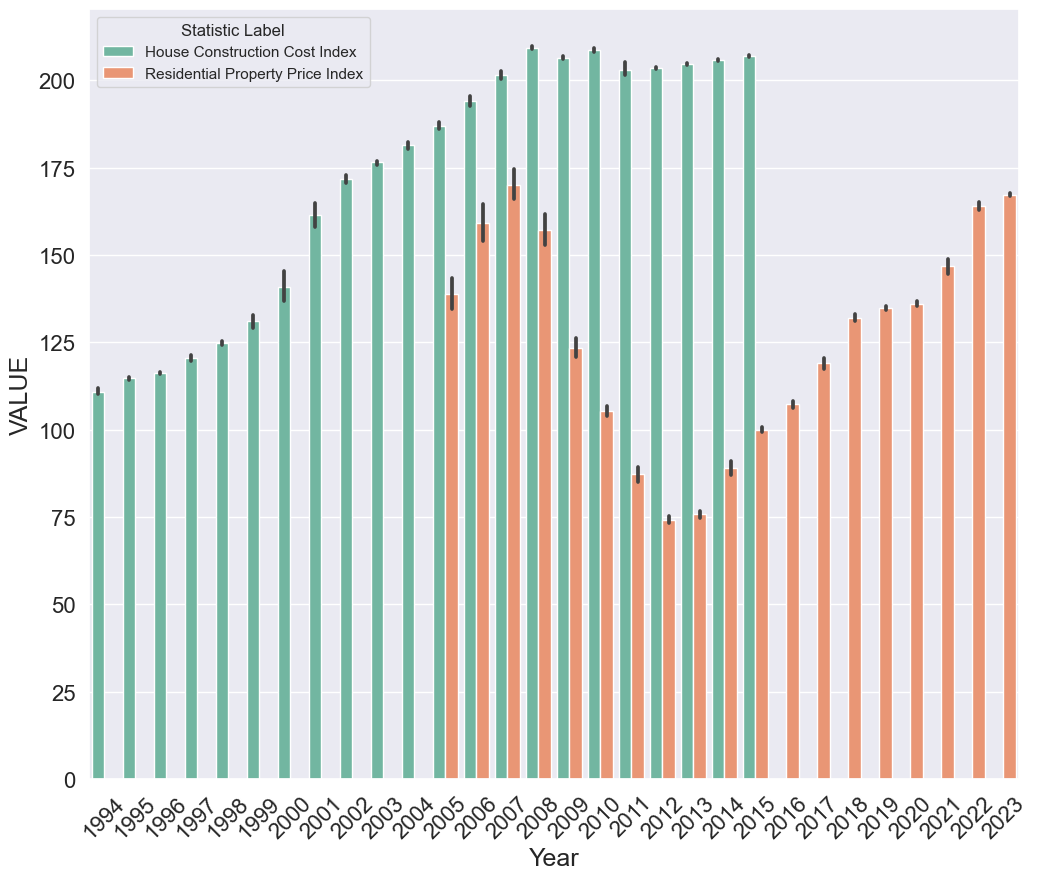

In [292]:
sns.set_palette("Set2")

sns.barplot(data=combined, x='Year', y='VALUE', hue='Statistic Label')
sns.set(rc={'figure.figsize':(12,10),'axes.labelsize': 18,'xtick.labelsize': 16, 'ytick.labelsize': 16})
plt.xticks(rotation=45);

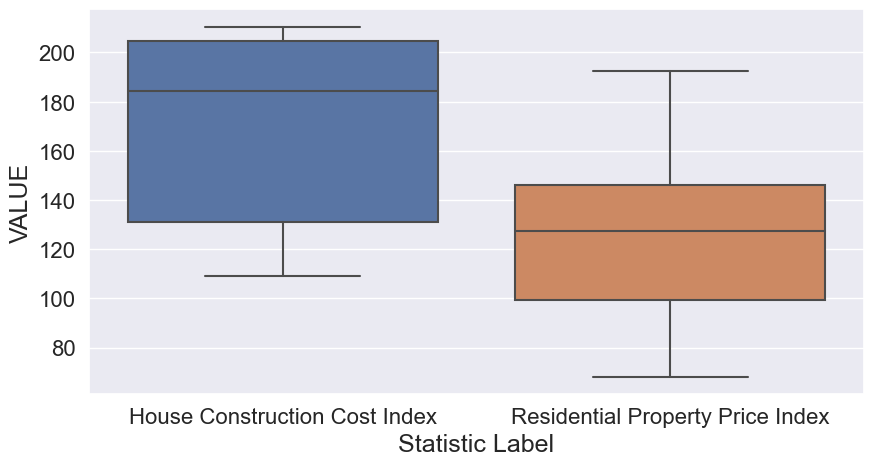

In [293]:
plt.figure(figsize=(10,5))  
sns.boxplot(x='Statistic Label', y='VALUE',data=combined)
plt.show()

In [333]:
merged = pd.merge(df3_new,df4_filt, on=["Year","Month"], how="left")

In [334]:
merged

,Year,Month,VALUE_x,Statistic Label_x,Statistic Label_y,Type_of_Residential_Property,UNIT,VALUE_y
0,1994,April,110.3,House Construction Cost Index,NaN,NaN,NaN,NaN
1,1994,August,110.9,House Construction Cost Index,NaN,NaN,NaN,NaN
2,1994,December,113.1,House Construction Cost Index,NaN,NaN,NaN,NaN
3,1994,February,109.3,House Construction Cost Index,NaN,NaN,NaN,NaN
4,1994,January,109.2,House Construction Cost Index,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
523,2015,October,207.2,House Construction Cost Index,Residential Property Price Index,National - houses,Base 2015=100,103.2
524,2015,October,207.2,House Construction Cost Index,Residential Property Price Index,National - apartments,Base 2015=100,103.3
525,2015,September,207.3,House Construction Cost Index,Residential Property Price Index,National - all residential properties,Base 2015=100,102.4
526,2015,September,207.3,House Construction Cost Index,Residential Property Price Index,National - houses,Base 2015=100,102.2


In [335]:
merged = merged.rename(columns={'VALUE_x': 'Construction_Cost_Index', 'VALUE_y': 'Property_Price_Index'})

merged = merged.drop(['Statistic Label_x', 'UNIT', 'Statistic Label_y', 'Type_of_Residential_Property'], axis=1)

In [336]:
merged[["Year","Construction_Cost_Index"]]=merged[["Year","Construction_Cost_Index"]].apply(pd.to_numeric)

In [337]:
merged.head()

,Year,Month,Construction_Cost_Index,Property_Price_Index
0,1994,April,110.3,NaN
1,1994,August,110.9,NaN
2,1994,December,113.1,NaN
3,1994,February,109.3,NaN
4,1994,January,109.2,NaN


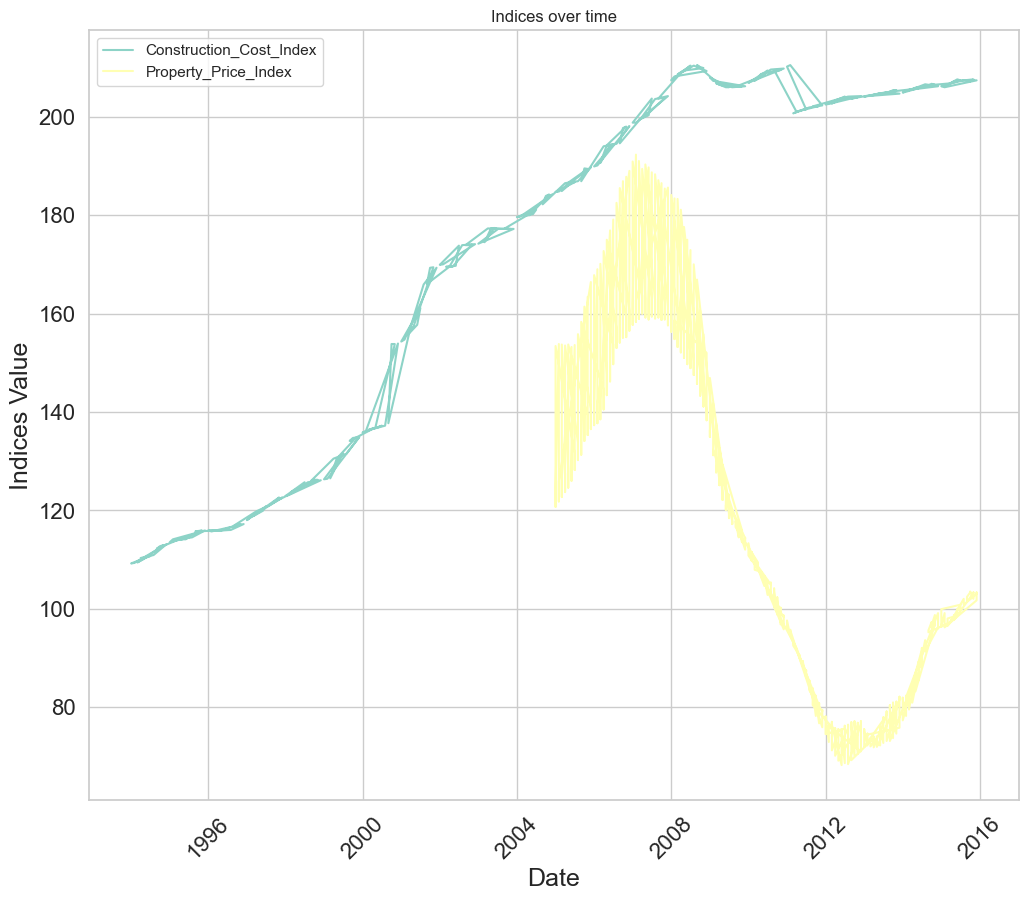

In [338]:
#For the purpose of visualisation, want the year and month to show as date times.
merged['Date'] = pd.to_datetime(merged['Year'].astype(str) + '-' + merged['Month'], format='%Y-%B')

# Plotting the index data against the datetime column using plt
plt.plot(merged['Date'], merged['Construction_Cost_Index'], label='Construction_Cost_Index')
plt.plot(merged['Date'], merged['Property_Price_Index'], label='Property_Price_Index')

plt.xlabel('Date')
plt.ylabel('Indices Value')
plt.title('Indices over time')
plt.legend()
plt.xticks(rotation=45);

/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



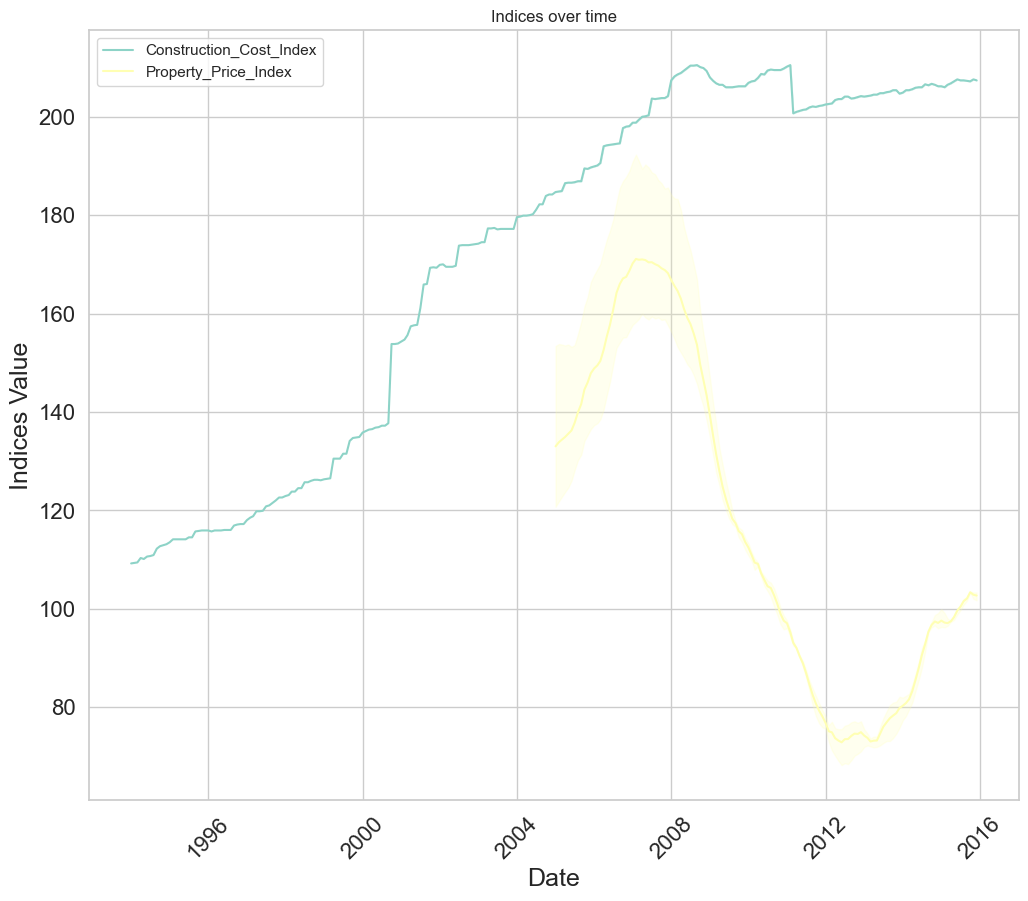

In [339]:
#For the purpose of visualisation, want the year and month to show as date times.
merged['Date'] = pd.to_datetime(merged['Year'].astype(str) + '-' + merged['Month'], format='%Y-%B')

# Plotting the index data against the datetime column using seaborn
sns.lineplot(merged['Date'], merged['Construction_Cost_Index'], label='Construction_Cost_Index')
sns.lineplot(merged['Date'], merged['Property_Price_Index'], label='Property_Price_Index')

plt.xlabel('Date')
plt.ylabel('Indices Value')
plt.title('Indices over time')
plt.legend()
plt.xticks(rotation=45);

In [340]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year                     528 non-null    int64         
 1   Month                    528 non-null    object        
 2   Construction_Cost_Index  528 non-null    float64       
 3   Property_Price_Index     396 non-null    float64       
 4   Date                     528 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 24.8+ KB


In [302]:
corr = merged.corr()

<AxesSubplot:>

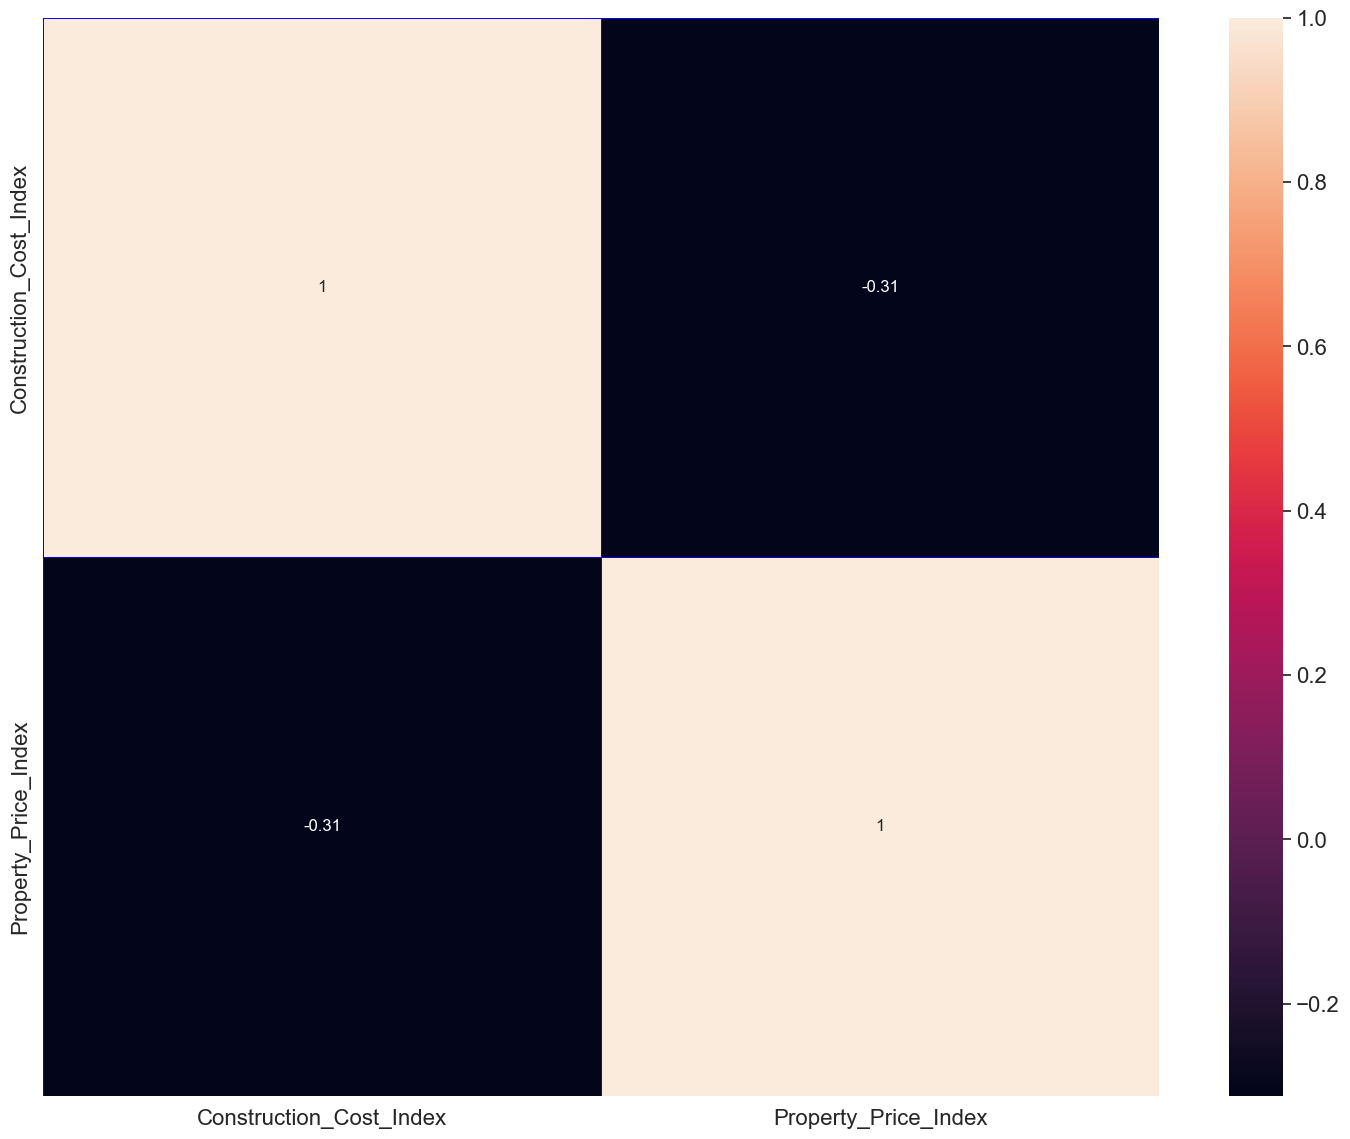

In [303]:
plt.figure(figsize=(18,14))
sns.heatmap(corr,annot=True,linecolor="blue",lw=0.5)

## df5 Construction Indices 

In [92]:
df5=pd.read_csv("download1061915290288055378.csv")

In [93]:
df5.head()

,FeatureCode,DateCode,Measurement,Units,Value,Construction indices
0,K02000001,2011 Feb,Costs,NaN,103.1,New Housing
1,K02000001,2011 Feb,Costs,NaN,104.4,All work
2,K02000001,2011 Feb,Costs,NaN,105.0,Other new work
3,K02000001,2011 Feb,Costs,NaN,103.7,Repairs and maintenance
4,K02000001,2016 Aug,Costs,NaN,110.1,New Housing


In [94]:
df5.tail()

,FeatureCode,DateCode,Measurement,Units,Value,Construction indices
488,K02000001,2018 Apr,Costs,NaN,119.1,Repairs and maintenance
489,K02000001,2018 Apr,Costs,NaN,118.4,All work
490,K02000001,2012 Sep,Costs,NaN,109.8,All work
491,K02000001,2002 Q1,Costs,NaN,117.1,Index of hourly wage costs
492,K02000001,2012 Sep,Costs,NaN,107.1,New Housing


In [95]:
df5 = df5.drop(["FeatureCode","Measurement","Units"], axis=1)

In [96]:
df5.head()

,DateCode,Value,Construction indices
0,2011 Feb,103.1,New Housing
1,2011 Feb,104.4,All work
2,2011 Feb,105.0,Other new work
3,2011 Feb,103.7,Repairs and maintenance
4,2016 Aug,110.1,New Housing


In [97]:
df5.dtypes

DateCode                 object
Value                   float64
Construction indices     object
dtype: object

In [98]:
df5.sort_values(by=["DateCode"], inplace=True)

In [99]:
df5

,DateCode,Value,Construction indices
466,2000 Q1,102.4,Index of hourly wage costs
152,2000 Q2,98.1,Index of hourly wage costs
90,2000 Q3,99.8,Index of hourly wage costs
351,2000 Q4,99.8,Index of hourly wage costs
201,2001 Q1,110.4,Index of hourly wage costs
...,...,...,...
383,2019 May,123.1,New Housing
373,2019 May,124.1,Other new work
372,2019 May,123.2,Repairs and maintenance
370,2019 May,122.7,All work


In [100]:
df5_sorted = df5.sort_values(by='DateCode')

In [101]:
df5_sorted.head()

,DateCode,Value,Construction indices
466,2000 Q1,102.4,Index of hourly wage costs
152,2000 Q2,98.1,Index of hourly wage costs
90,2000 Q3,99.8,Index of hourly wage costs
351,2000 Q4,99.8,Index of hourly wage costs
201,2001 Q1,110.4,Index of hourly wage costs


In [102]:
#As the date code in in Quarters as a string in some columns
#Need to split. 

df5_sorted['DateCode']= df5_sorted['DateCode'].str.split(' ').str[0].astype(int)

#Insert Ref

In [103]:
df5_sorted['DateCode'] = pd.to_datetime(df5_sorted['DateCode'])

In [104]:
df5label = df5.groupby(by=['Construction indices']).size()
print(df5label)

Construction indices
All work                      104
Index of hourly wage costs     77
New Housing                   104
Other new work                104
Repairs and maintenance       104
dtype: int64


In [105]:
df5_Wage_Index = df5[df5['Construction indices'] == 'Index of hourly wage costs']

print(df5_Wage_Index)

    DateCode  Value        Construction indices
466  2000 Q1  102.4  Index of hourly wage costs
152  2000 Q2   98.1  Index of hourly wage costs
90   2000 Q3   99.8  Index of hourly wage costs
351  2000 Q4   99.8  Index of hourly wage costs
201  2001 Q1  110.4  Index of hourly wage costs
..       ...    ...                         ...
58   2018 Q1  174.4  Index of hourly wage costs
472  2018 Q2  172.6  Index of hourly wage costs
150  2018 Q3  173.7  Index of hourly wage costs
88   2018 Q4  180.6  Index of hourly wage costs
452  2019 Q1  175.5  Index of hourly wage costs

[77 rows x 3 columns]


In [106]:
###fix this

In [107]:
df5_sorted = df5_sorted[df5_sorted['Construction indices'].str.contains('Index of hourly wage costs')==False]

In [108]:
df5_sorted

,DateCode,Value,Construction indices
366,1970-01-01 00:00:00.000002010,101.4,All work
365,1970-01-01 00:00:00.000002010,102.0,New Housing
364,1970-01-01 00:00:00.000002010,102.2,Repairs and maintenance
363,1970-01-01 00:00:00.000002010,101.3,Other new work
82,1970-01-01 00:00:00.000002010,102.3,New Housing
...,...,...,...
284,1970-01-01 00:00:00.000002019,123.2,All work
372,1970-01-01 00:00:00.000002019,123.2,Repairs and maintenance
370,1970-01-01 00:00:00.000002019,122.7,All work
383,1970-01-01 00:00:00.000002019,123.1,New Housing


<AxesSubplot:xlabel='DateCode', ylabel='Value'>

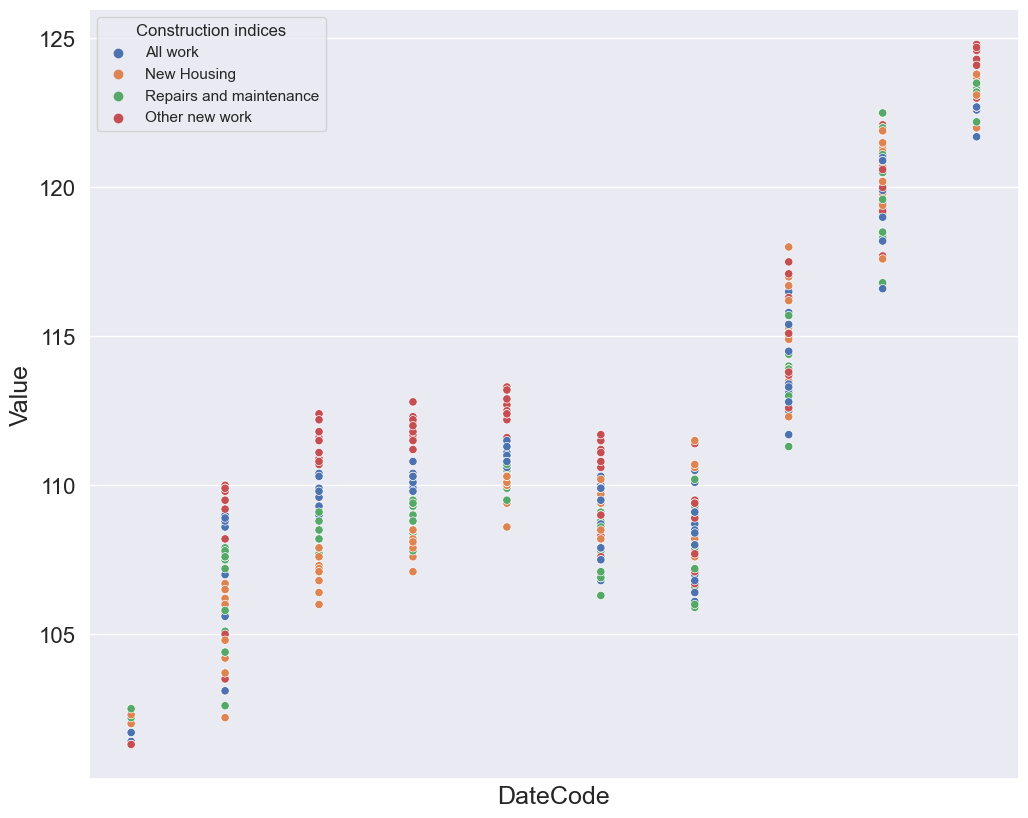

In [109]:
sns.scatterplot(data=df5_sorted, x='DateCode', y='Value', hue='Construction indices')

## df6 Index of Employment in Construction 

In [110]:
df6=pd.read_csv("BBA02.20230428105548.csv")

In [111]:
df6.head()

,STATISTIC,Statistic Label,C02196V02652,State,TLIST(A1),Year,UNIT,VALUE
0,BBA02,Annual Average Index of Employment (1975 - Dat...,-,State,1975,1975,Base 2000=100,133.2
1,BBA02,Annual Average Index of Employment (1975 - Dat...,-,State,1976,1976,Base 2000=100,128.1
2,BBA02,Annual Average Index of Employment (1975 - Dat...,-,State,1977,1977,Base 2000=100,134.8
3,BBA02,Annual Average Index of Employment (1975 - Dat...,-,State,1978,1978,Base 2000=100,147.0
4,BBA02,Annual Average Index of Employment (1975 - Dat...,-,State,1979,1979,Base 2000=100,158.8


In [112]:
df6 = df6.drop(["C02196V02652","TLIST(A1)","UNIT", "STATISTIC", "State"], axis=1)

In [113]:
df6

,Statistic Label,Year,VALUE
0,Annual Average Index of Employment (1975 - Dat...,1975,133.2
1,Annual Average Index of Employment (1975 - Dat...,1976,128.1
2,Annual Average Index of Employment (1975 - Dat...,1977,134.8
3,Annual Average Index of Employment (1975 - Dat...,1978,147.0
4,Annual Average Index of Employment (1975 - Dat...,1979,158.8
5,Annual Average Index of Employment (1975 - Dat...,1980,156.1
6,Annual Average Index of Employment (1975 - Dat...,1981,152.9
7,Annual Average Index of Employment (1975 - Dat...,1982,135.6
8,Annual Average Index of Employment (1975 - Dat...,1983,110.7
9,Annual Average Index of Employment (1975 - Dat...,1984,101.1


In [114]:
df6.dtypes

Statistic Label     object
Year                 int64
VALUE              float64
dtype: object

<AxesSubplot:xlabel='Year', ylabel='VALUE'>

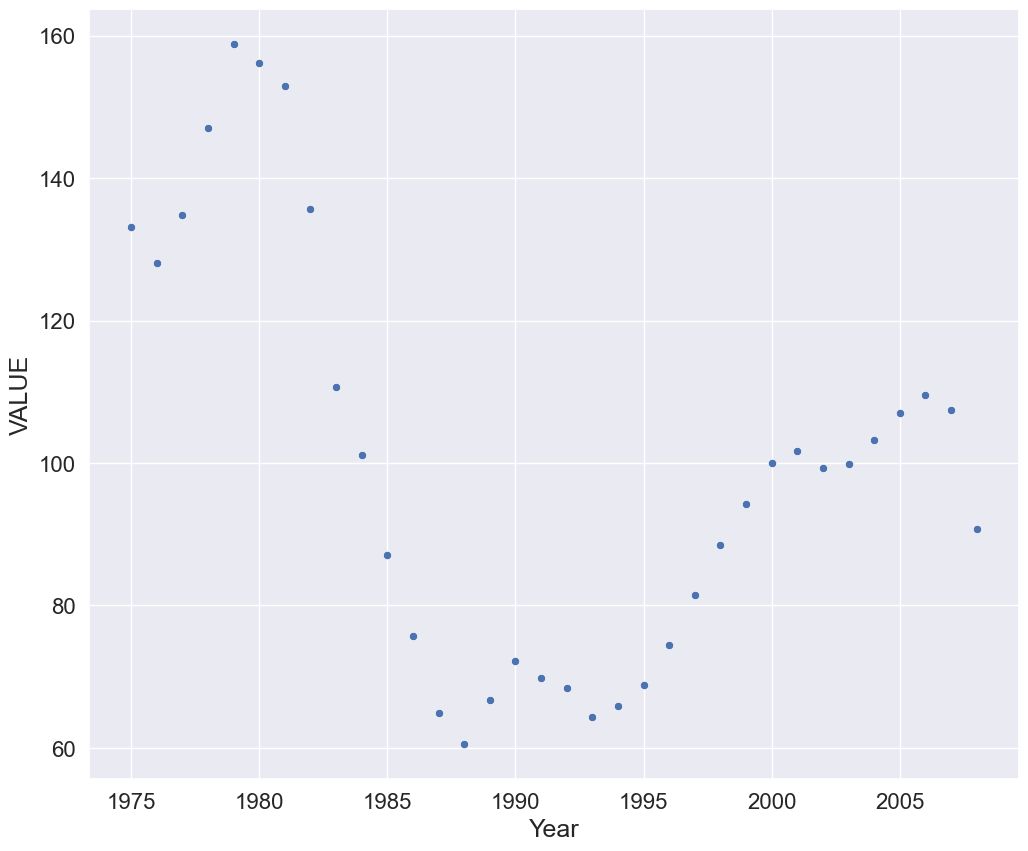

In [115]:
sns.scatterplot(x=df6['Year'],y=df6['VALUE'])

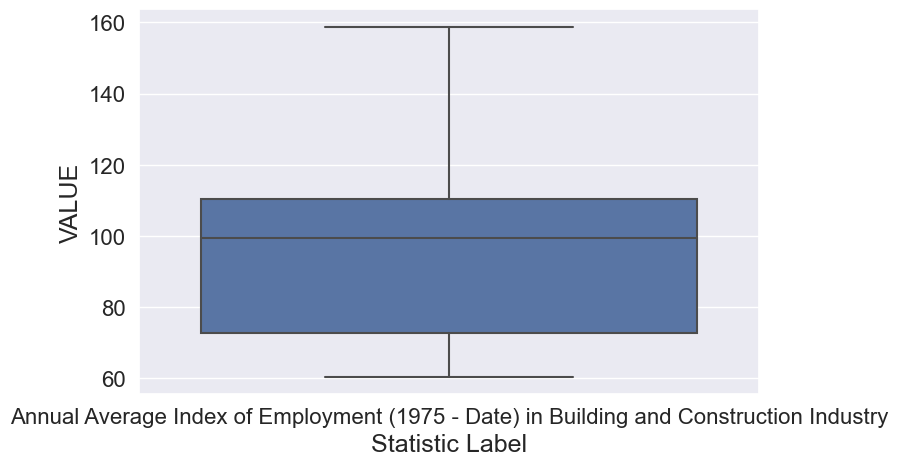

In [116]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Statistic Label', y='VALUE',data=df6)
plt.show()

## df7 Labour Input Europe 

In [117]:
df7=pd.read_csv("Labourinput_Europe.tsv",sep="\t|,", engine='python')
#reverts to the tab - file is .tsv#

In [118]:
df7.head()

,indic_bt,nace_r2,s_adj,unit,geo\time,2022,2021,2020,2019,2018,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,EMPL,F,NSA,I10,AL,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
1,EMPL,F,NSA,I10,AT,:,:,:,:,:,...,104.8,109.5,101.1,102.1,:,:,:,:,:,:
2,EMPL,F,NSA,I10,BE,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
3,EMPL,F,NSA,I10,BG,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
4,EMPL,F,NSA,I10,CH,:,:,:,:,:,...,88.0,89.1,:,:,:,:,:,:,:,:


In [119]:
df7=df7.drop(["indic_bt", "nace_r2", "s_adj"], axis=1)

In [120]:
df7.head()

,unit,geo\time,2022,2021,2020,2019,2018,2017,2016,2015,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,I10,AL,:,:,:,:,:,:,123.0,115.8,...,:,:,:,:,:,:,:,:,:,:
1,I10,AT,:,:,:,:,:,103.3 p,101.0,100.9,...,104.8,109.5,101.1,102.1,:,:,:,:,:,:
2,I10,BE,:,:,:,:,:,:,101.9 p,100.2,...,:,:,:,:,:,:,:,:,:,:
3,I10,BG,:,:,:,:,:,70.3 p,71.4 p,74.9 p,...,:,:,:,:,:,:,:,:,:,:
4,I10,CH,:,:,:,:,:,103.5,103.9,105.1,...,88.0,89.1,:,:,:,:,:,:,:,:


In [121]:
df7m=df7.melt(id_vars=["geo\\time", "unit"], 
        var_name="Year", 
        value_name="Labour Input")

In [122]:
df7m['Labour Input'].nunique()

2749

In [123]:
df7m.head(50)

,geo\time,unit,Year,Labour Input
0,AL,I10,2022,:
1,AT,I10,2022,:
2,BE,I10,2022,:
3,BG,I10,2022,:
4,CH,I10,2022,:
5,CY,I10,2022,:
6,CZ,I10,2022,:
7,DE,I10,2022,:
8,DK,I10,2022,:
9,EA19,I10,2022,:


In [124]:
df7m = df7m.rename(columns={'geo\\time': 'Country'})

In [125]:
import numpy as np

#Need to remove all white space to address the unavailable values.
df7m= df7m.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#Replace the ':' vale with NaN. 
df7m = df7m.replace(':', np.nan)

#Ref - https://stackoverflow.com/questions/33788913/pythonic-efficient-way-to-strip-whitespace-from-every-pandas-data-frame-cell-tha

In [126]:
df7m.head(50)

,Country,unit,Year,Labour Input
0,AL,I10,2022,NaN
1,AT,I10,2022,NaN
2,BE,I10,2022,NaN
3,BG,I10,2022,NaN
4,CH,I10,2022,NaN
5,CY,I10,2022,NaN
6,CZ,I10,2022,NaN
7,DE,I10,2022,NaN
8,DK,I10,2022,NaN
9,EA19,I10,2022,NaN


In [127]:
#Replacing everything that isn't a number 0 to 9, or a decimal point.
#Revisit.

#df7m = df7m.apply(lambda x: x.str.replace('[^0-9.]+', '', regex=True) if x.name == "Labour Input" else x)
df7m["Labour Input"] = df7m["Labour Input"].str.replace('[^0-9.]+', '', regex=True)

#Ref - https://copyprogramming.com/howto/python-pandas-how-to-remove-non-numeric-characters-from-multiple-columns

In [128]:
df7m.dtypes

Country         object
unit            object
Year            object
Labour Input    object
dtype: object

In [129]:
df7m['Labour Input'] = df7m['Labour Input'].replace('', np.nan)
df7m.dropna(subset=['Labour Input'], inplace=True)

In [130]:
df7m.head()

,Country,unit,Year,Labour Input
38,AL,I15,2022,126.8
39,AT,I15,2022,122.2
41,BG,I15,2022,90.2
42,CH,I15,2022,105.8
43,CY,I15,2022,168.6


In [131]:
df7m['Labour Input'] = df7m['Labour Input'].astype(float)

In [132]:
import plotly.express as px

## df8 Price Index for Building Materials 

In [136]:
df8=pd.read_csv("PriceIndex_BuildingConstruction_Materials_Ireland.csv")

In [137]:
df8=df8.drop(["STATISTIC", "TLIST(A1)", "C01409V03262"], axis=1)

In [138]:
df8

,Statistic Label,Year,Type of Material,UNIT,VALUE
0,Wholesale Price Index (Excl VAT) for Building ...,2015,Materials,Base 2015=100,100.0
1,Wholesale Price Index (Excl VAT) for Building ...,2015,"Stone, sand and gravel",Base 2015=100,100.0
2,Wholesale Price Index (Excl VAT) for Building ...,2015,Sand and gravel,Base 2015=100,100.0
3,Wholesale Price Index (Excl VAT) for Building ...,2015,Stone,Base 2015=100,100.0
4,Wholesale Price Index (Excl VAT) for Building ...,2015,Cement,Base 2015=100,100.0
...,...,...,...,...,...
635,Percentage Change over 12 months in Wholesale ...,2022,Plaster,%,25.4
636,Percentage Change over 12 months in Wholesale ...,2022,"Paints, oils and varnishes",%,13.0
637,Percentage Change over 12 months in Wholesale ...,2022,Glass,%,5.7
638,Percentage Change over 12 months in Wholesale ...,2022,All other metal fittings,%,2.1


In [139]:
print(df8.groupby('Type of Material').size())

#To show the different types of material

Type of Material
All other materials                                     16
All other metal fittings                                16
All other products                                      16
Bituminous emulsions                                    16
Bituminous macadam and asphalt                          16
Bituminous macadam, asphalt and bituminous emulsions    16
Cement                                                  16
Concrete blocks and bricks                              16
Copper pipes and fittings                               16
Electrical fittings                                     16
Glass                                                   16
HVAC (heating and ventilation equipment)                16
Insulating materials                                    16
Lighting equipment                                      16
Machined, treated engineered timber                     16
Materials                                               16
Other concrete products (excluding prec

In [140]:
print(df8.groupby('Statistic Label').size())

Statistic Label
Percentage Change over 12 months in Wholesale Price Index                   320
Wholesale Price Index (Excl VAT) for Building and Construction Materials    320
dtype: int64


In [143]:
##Revisit

# split the column by comma and create new columns for each variable
#df8[['Price_Index', '%Change']] = df8['Statistic Label'].str.split(',', expand=True)

# drop the original column
#df8.drop('Statistic Label', axis=1, inplace=True)

#print(df8)

## df9 Purchases in Construction Ireland 

In [145]:
df9=pd.read_csv("Purchases_BuildingConstruction_New Basis_Ireland.csv")

In [146]:
df9.head()

,STATISTIC,Statistic Label,C02407V02905,Building Sector,C01989V02424,Type of Purchases,TLIST(A1),Year,UNIT,VALUE
0,BAA07,Purchases in Building and Construction Industr...,45,All construction (45),23,"All purchases of materials, fuel and energy",2005,2005,Euro Thousand,3641555.0
1,BAA07,Purchases in Building and Construction Industr...,45,All construction (45),23,"All purchases of materials, fuel and energy",2006,2006,Euro Thousand,4371160.0
2,BAA07,Purchases in Building and Construction Industr...,45,All construction (45),23,"All purchases of materials, fuel and energy",2007,2007,Euro Thousand,4009412.0
3,BAA07,Purchases in Building and Construction Industr...,45,All construction (45),231,Materials,2005,2005,Euro Thousand,3509030.0
4,BAA07,Purchases in Building and Construction Industr...,45,All construction (45),231,Materials,2006,2006,Euro Thousand,4212084.0


In [147]:
df9.tail()

,STATISTIC,Statistic Label,C02407V02905,Building Sector,C01989V02424,Type of Purchases,TLIST(A1),Year,UNIT,VALUE
229,BAA07,Purchases in Building and Construction Industr...,455,Renting of construction or demolition equipmen...,23224,Fuel oil for stationary uses - other fuel oil,2006,2006,Euro Thousand,NaN
230,BAA07,Purchases in Building and Construction Industr...,455,Renting of construction or demolition equipmen...,23224,Fuel oil for stationary uses - other fuel oil,2007,2007,Euro Thousand,NaN
231,BAA07,Purchases in Building and Construction Industr...,455,Renting of construction or demolition equipmen...,233,Electricity,2005,2005,Euro Thousand,226.0
232,BAA07,Purchases in Building and Construction Industr...,455,Renting of construction or demolition equipmen...,233,Electricity,2006,2006,Euro Thousand,271.0
233,BAA07,Purchases in Building and Construction Industr...,455,Renting of construction or demolition equipmen...,233,Electricity,2007,2007,Euro Thousand,571.0


In [148]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          234 non-null    object 
 1   Statistic Label    234 non-null    object 
 2   C02407V02905       234 non-null    int64  
 3   Building Sector    234 non-null    object 
 4   C01989V02424       234 non-null    int64  
 5   Type of Purchases  234 non-null    object 
 6   TLIST(A1)          234 non-null    int64  
 7   Year               234 non-null    int64  
 8   UNIT               234 non-null    object 
 9   VALUE              173 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 18.4+ KB


In [149]:
df9.describe(include="all")

,STATISTIC,Statistic Label,C02407V02905,Building Sector,C01989V02424,Type of Purchases,TLIST(A1),Year,UNIT,VALUE
count,234,234,234.000000,234,234.000000,234,234.000000,234.000000,234,1.730000e+02
unique,1,1,NaN,6,NaN,13,NaN,NaN,1,NaN
top,BAA07,Purchases in Building and Construction Industr...,NaN,All construction (45),NaN,"All purchases of materials, fuel and energy",NaN,NaN,Euro Thousand,NaN
freq,234,234,NaN,39,NaN,18,NaN,NaN,234,NaN
mean,NaN,NaN,385.000000,NaN,12914.461538,NaN,2006.000000,2006.000000,NaN,2.817845e+05
std,NaN,NaN,152.384059,NaN,11174.226268,NaN,0.818247,0.818247,NaN,8.884327e+05
min,NaN,NaN,45.000000,NaN,23.000000,NaN,2005.000000,2005.000000,NaN,0.000000e+00
25%,NaN,NaN,451.000000,NaN,233.000000,NaN,2005.000000,2005.000000,NaN,1.523000e+03
50%,NaN,NaN,452.500000,NaN,23211.000000,NaN,2006.000000,2006.000000,NaN,9.888000e+03
75%,NaN,NaN,454.000000,NaN,23221.000000,NaN,2007.000000,2007.000000,NaN,5.581500e+04


In [150]:
df9=df9.drop(["STATISTIC","C02407V02905", "C01989V02424", "Statistic Label", "TLIST(A1)"], axis=1)

In [151]:
df9.head()

,Building Sector,Type of Purchases,Year,UNIT,VALUE
0,All construction (45),"All purchases of materials, fuel and energy",2005,Euro Thousand,3641555.0
1,All construction (45),"All purchases of materials, fuel and energy",2006,Euro Thousand,4371160.0
2,All construction (45),"All purchases of materials, fuel and energy",2007,Euro Thousand,4009412.0
3,All construction (45),Materials,2005,Euro Thousand,3509030.0
4,All construction (45),Materials,2006,Euro Thousand,4212084.0


In [152]:
df9 = df9.sort_values('Year')

In [153]:
df9.head()

,Building Sector,Type of Purchases,Year,UNIT,VALUE
0,All construction (45),"All purchases of materials, fuel and energy",2005,Euro Thousand,3641555.0
195,Renting of construction or demolition equipmen...,"All purchases of materials, fuel and energy",2005,Euro Thousand,30692.0
108,Building of complete constructions or part the...,Fuel oil for stationary uses - LPG (bottled gas),2005,Euro Thousand,NaN
105,Building of complete constructions or part the...,Fuel oil for stationary uses - kerosene,2005,Euro Thousand,756.0
102,Building of complete constructions or part the...,"Fuel oil for stationary uses - gas, oil and di...",2005,Euro Thousand,11667.0


In [154]:
df9_05 = df9[df9['Year'] == 2007]
print(df9_05)

                                       Building Sector  \
194                          Building completion (454)   
215  Renting of construction or demolition equipmen...   
176                          Building completion (454)   
227  Renting of construction or demolition equipmen...   
212  Renting of construction or demolition equipmen...   
..                                                 ...   
95   Building of complete constructions or part the...   
92   Building of complete constructions or part the...   
89   Building of complete constructions or part the...   
128                        Building installation (453)   
233  Renting of construction or demolition equipmen...   

                                    Type of Purchases  Year           UNIT  \
194                                       Electricity  2007  Euro Thousand   
215                   Motor fuel - LPG (for vehicles)  2007  Euro Thousand   
176                   Motor fuel - LPG (for vehicles)  2007  Euro Tho

In [155]:
df9 = df9.rename(columns={'Type of Purchases': 'Purchase_Type'})

In [156]:
print(df9.groupby('Purchase_Type').size())

Purchase_Type
All fuel                                              18
All fuel oil for stationary uses                      18
All motor fuel                                        18
All purchases of materials, fuel and energy           18
Electricity                                           18
Fuel oil for stationary uses - LPG (bottled gas)      18
Fuel oil for stationary uses - gas, oil and diesel    18
Fuel oil for stationary uses - kerosene               18
Fuel oil for stationary uses - other fuel oil         18
Materials                                             18
Motor fuel - LPG (for vehicles)                       18
Motor fuel - auto diesel                              18
Motor fuel - petrol                                   18
dtype: int64


In [157]:
print(df9.groupby('Building Sector').size())

Building Sector
All construction (45)                                                           39
Building completion (454)                                                       39
Building installation (453)                                                     39
Building of complete constructions or part there of; civil engineering (452)    39
Renting of construction or demolition equipment with operator (455)             39
Site preparation (451)                                                          39
dtype: int64


<Figure size 1200x1000 with 0 Axes>

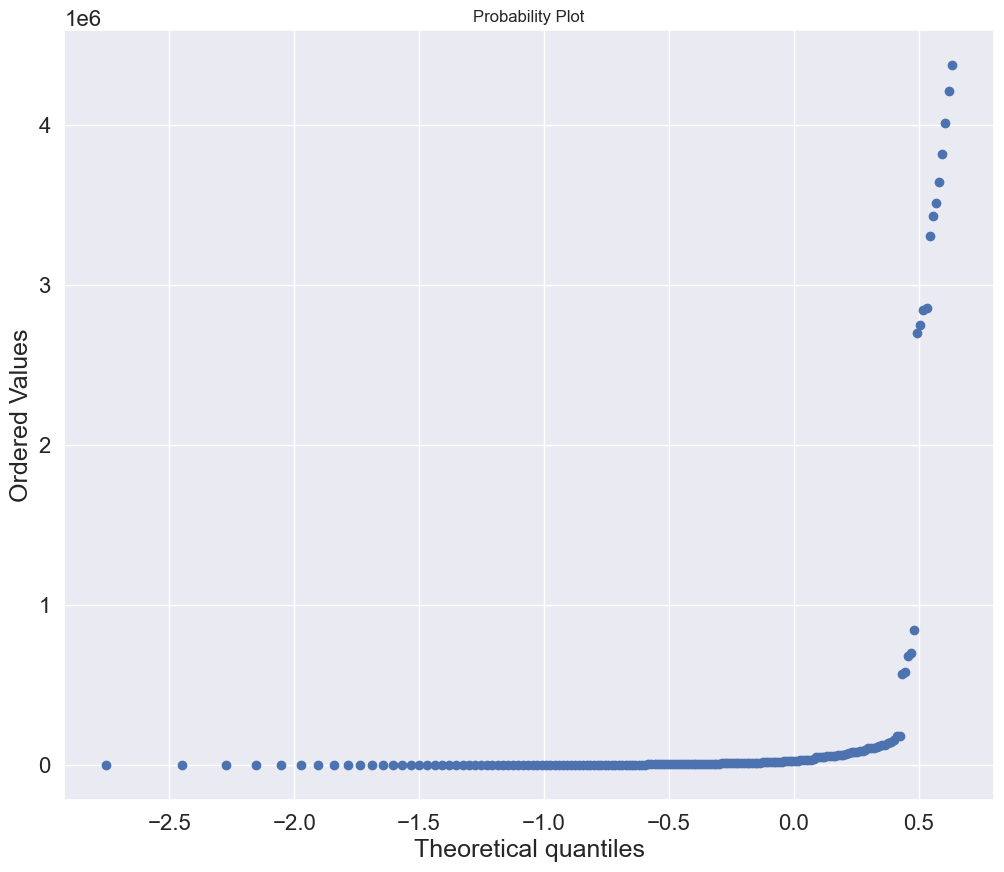

<Figure size 1200x1000 with 0 Axes>

In [158]:
#Normality plot using 'value' as the variable. 

stats.probplot(df9.VALUE, plot=plt)
plt.figure()

In [159]:
stats.shapiro(df9.VALUE[df9.Purchase_Type== "All fuel"])

ShapiroResult(statistic=nan, pvalue=1.0)

In [160]:
stats.shapiro(df9.VALUE[df9.Purchase_Type== "Electricity"])

ShapiroResult(statistic=0.6784201860427856, pvalue=4.52942585980054e-05)

In [161]:
stats.shapiro(df9.VALUE[df9.Purchase_Type== "Materials"])

ShapiroResult(statistic=0.757086992263794, pvalue=0.00039974116953089833)

## Global construction empoyment numbers in thousand persons.

In [162]:
df10 = pd.read_csv("Global_Con_Employment.csv")

In [163]:
df10.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EMPINDUS,CONSTR,THND_PER,A,2018,1178.354,NaN
1,AUS,EMPINDUS,CONSTR,THND_PER,A,2019,1173.967,NaN
2,AUS,EMPINDUS,CONSTR,THND_PER,A,2020,1173.959,NaN
3,AUS,EMPINDUS,CONSTR,THND_PER,A,2021,1149.426,NaN
4,AUS,EMPINDUS,CONSTR,THND_PER,A,2022,1231.692,NaN


In [164]:
## Indicator, subject and frequency contain the same values for all rows. 
##Flag codes column contains all NaNs so is of no value. Drop these rows.

df10=df10.drop(["INDICATOR","SUBJECT", "FREQUENCY", "Flag Codes"], axis=1)

In [165]:
df10

,LOCATION,MEASURE,TIME,Value
0,AUS,THND_PER,2018,1178.3540
1,AUS,THND_PER,2019,1173.9670
2,AUS,THND_PER,2020,1173.9590
3,AUS,THND_PER,2021,1149.4260
4,AUS,THND_PER,2022,1231.6920
...,...,...,...,...
212,CRI,THND_PER,2018,146.5352
213,CRI,THND_PER,2019,149.5847
214,CRI,THND_PER,2020,127.1860
215,CRI,THND_PER,2021,128.8290


In [166]:
#To look at the non numeric columns, include="all".
#This shows the unit of measure is the same for each row. There is 44 unique locations included.

df10.describe(include="all")

,LOCATION,MEASURE,TIME,Value
count,217,217,217.000000,217.000000
unique,44,1,NaN,NaN
top,AUS,THND_PER,NaN,NaN
freq,5,217,NaN,NaN
mean,NaN,NaN,2019.981567,3280.497363
std,NaN,NaN,1.414093,7878.679459
min,NaN,NaN,2018.000000,12.350000
25%,NaN,NaN,2019.000000,194.883300
50%,NaN,NaN,2020.000000,396.650000
75%,NaN,NaN,2021.000000,1846.000000


In [167]:
import matplotlib.pyplot as plt

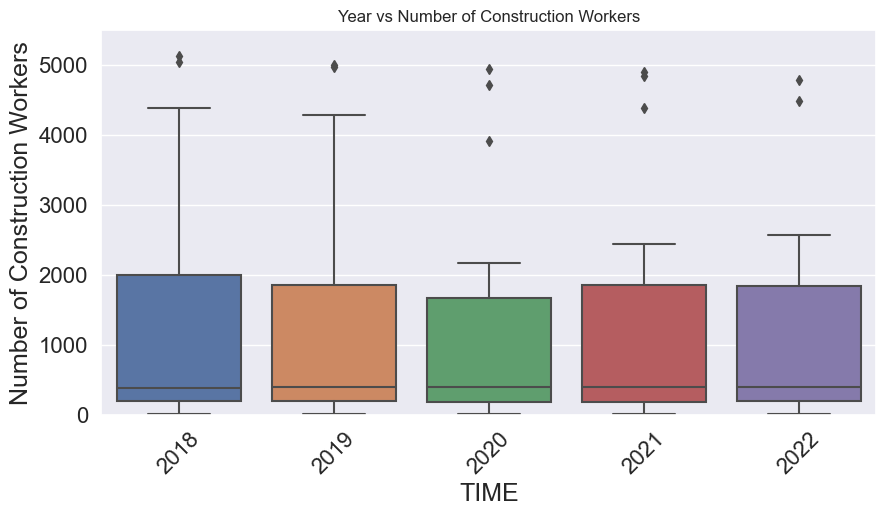

In [168]:
# Using seaborn to create a box plot.
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='TIME', y='Value', data=df10, ax=ax).set(title='Year vs Number of Construction Workers')

ax.set_ylabel('Number of Construction Workers')

# rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# specifying the y-axis limits
ax.set_ylim(0, 5500)

plt.show()

Can see the presence of outliers for all years.

In [169]:
mean = df10['Value'].mean()

print(mean)

3280.4973631336416


In [170]:
median = df10['Value'].median()

print(median)

396.65


mean > median therefore the data should be positively skewed when plotted.

/Users/seankearney/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Value', ylabel='Density'>

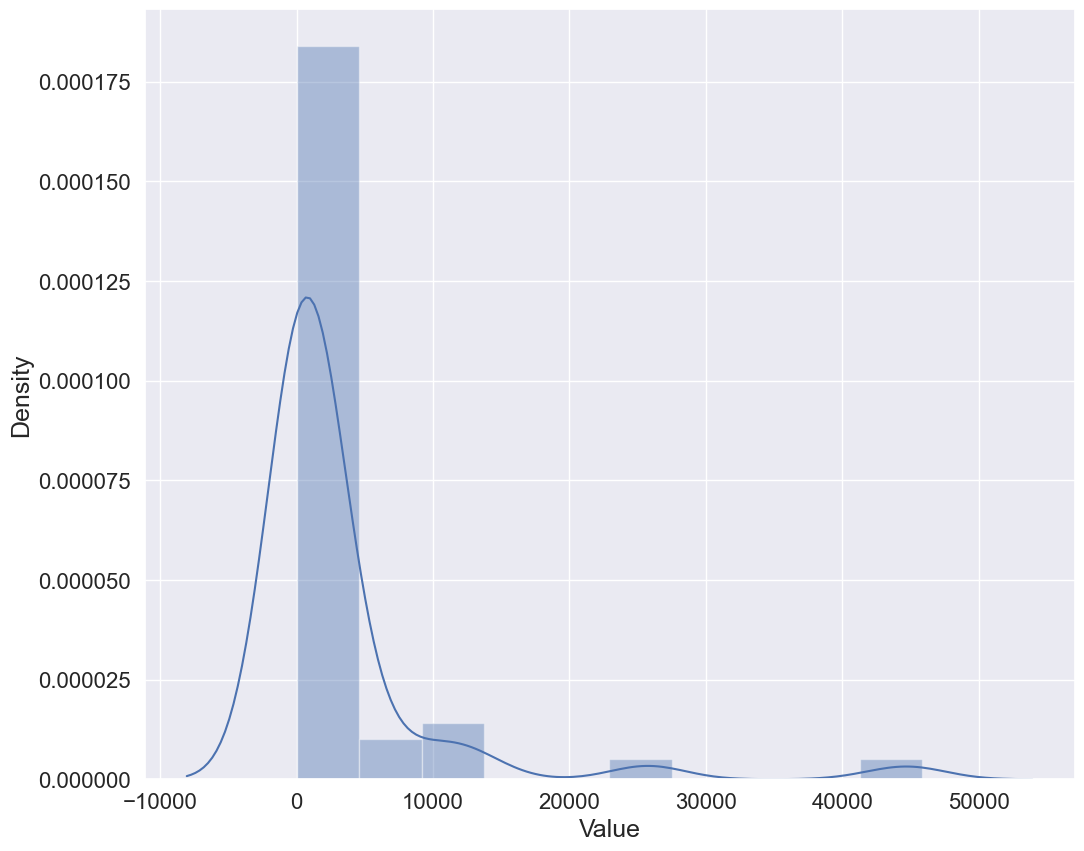

In [171]:
data = df10['Value']

sns.distplot(data, bins=10, hist=True, kde=True, label = 'No. of Construction Workers (Thousands)')

Data is normal. Can conclude the number of construction workers is heavily positively skewed.
Ref - https://gist.github.com/pb111/512c840affb32593d28573fbb764045b

## T-Test - One Population

In [173]:
X = df1C['value']; X

362     46.60
360      0.50
120      0.61
122     46.70
365     45.80
        ...  
1077    19.03
957     24.68
959     44.10
599     36.20
1079    43.20
Name: value, Length: 482, dtype: float64

In [174]:
#H0: U = 45
#H0: U =! 45

stats.ttest_1samp(X,45)

Ttest_1sampResult(statistic=-22.718702522572038, pvalue=3.6132673555813445e-78)

High pvalue, greater than 0.05. Negative statistic value indicating the sample mean is less than null hypothesis value. We accept H0, we reject H1 Average hours worked is 45 hours per week.

In [175]:
#H0: U = 39
#H0: U =! 39

stats.ttest_1samp(X,39)

Ttest_1sampResult(statistic=-15.419796684304075, pvalue=6.999204246082593e-44)

In [176]:
#H1 : u > 45
stats.t.sf(-5.860999654368139, 241)

0.9999999924781208

## T-test Two Populations

If we want to see the difference in hours worked between male and female clerical workers.

In [177]:
#Grouping data according to the categories

male = df1C.query('Type_of_Worker == "Clerical employees - male"')['value']
female = df1C.query('Type_of_Worker == "Clerical employees - female"')['value']

In [178]:
#Assuming H0 that mu1 = mu2 (Clerical employees - male = Clerical employees - female)
test = stats.ttest_ind(male, female, 
                      equal_var=True)

display(test)

Ttest_indResult(statistic=0.8790025285376729, pvalue=0.3817407431877444)

In [179]:
#Assuming H0 that mu1 = mu2 (Clerical employees - male = Clerical employees - female)
test = stats.ttest_ind(male, female, 
                      equal_var=False)

display(test)

Ttest_indResult(statistic=0.8790025285376729, pvalue=0.3817473106353896)

Due to the extremely small pvalue we can reject H0 and confirm average hours worked by the male employes is not equal to the average hours worked by female employees. 

### Confidence Interval

In [180]:
import scipy.stats as st

In [181]:
#DEFINE THE VARIABLE
X = df1C['value']; X

362     46.60
360      0.50
120      0.61
122     46.70
365     45.80
        ...  
1077    19.03
957     24.68
959     44.10
599     36.20
1079    43.20
Name: value, Length: 482, dtype: float64

In [182]:
#CENTRAL TENDENCY FOR THE AGE
mean = X.mean()
print("The mean is ", mean)

The mean is  26.32429460580915


In [183]:
#Using a 95% confidence interval for population average hours worked in construction industry

st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(X), scale=st.sem(X))

/var/folders/1b/33zzxyx55vd7hj0fyh3v6zv80000gn/T/ipykernel_14390/718828270.py:3: DeprecationWarning:

Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.



(24.70404561314318, 27.94454359847512)

As there is a large sample size, greater than 30, we assume sampling distribution of the sample mean is normally distributed
Ref - https://www.statology.org/confidence-intervals-python/

In [184]:
st.norm.interval(alpha=0.95, loc=np.mean(X), scale=st.sem(X))

/var/folders/1b/33zzxyx55vd7hj0fyh3v6zv80000gn/T/ipykernel_14390/2694636749.py:1: DeprecationWarning:

Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.



(24.71312381284124, 27.935465398777062)

### DF10 Number of People Employed in Construction by Country

#### Kruskal-Wallis H-test

In [185]:
print(df10.groupby('LOCATION').size())

LOCATION
AUS          5
AUT          5
BEL          5
CAN          5
CHE          5
CHL          5
COL          5
CRI          5
CZE          5
DEU          4
DNK          5
EA19         5
ESP          5
EST          5
EU27_2020    5
FIN          5
FRA          5
G-7          5
GBR          5
GRC          5
HUN          5
IRL          5
ISL          5
ISR          5
ITA          5
JPN          5
KOR          5
LTU          5
LUX          5
LVA          5
MEX          5
NLD          5
NOR          5
NZL          5
OECD         5
POL          5
PRT          5
RUS          4
SVK          5
SVN          5
SWE          5
TUR          5
USA          5
ZAF          4
dtype: int64


In [186]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

groups = df10.groupby('LOCATION')

# Extract data for each group
data1 = groups.get_group('IRL')['Value']
data2 = groups.get_group('AUS')['Value']
data3 = groups.get_group('USA')['Value']

# Compute the Kruskal-Wallis H-test
stat, p = st.kruskal(data1, data2, data3)

# Print the test statistics and p-value
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Same distributions (fail to reject H0)')
else:
 print('Different distributions (reject H0)')

Statistics=12.500, p=0.002
Different distributions (reject H0)


Ref - https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

#### Mann Whitney U Test

Non parametric significance test used to determine whether two independant variables were drawn from a population within the same distribution. Typically works best with a sample size greater than 20 observations.

In [187]:
from scipy.stats import mannwhitneyu

groups = df10.groupby('LOCATION')

# Extract data for each group
data1 = groups.get_group('IRL')['Value']
data2 = groups.get_group('AUS')['Value']

# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.008
Different distribution (reject H0)


Ref - https://jmyao17.github.io/Statistics/Nonparametric_Statistical_Significance_Tests.html

#### Wilcoxon Signed-Rank Test

In [188]:
from scipy.stats import wilcoxon

groups = df10.groupby('LOCATION')

# Extract data for each group
data1 = groups.get_group('IRL')['Value']
data2 = groups.get_group('AUS')['Value']

# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.062
Same distribution (fail to reject H0)


#### Chi Squared Test

To look at whether the cateogory of the building sector is dependant on the purchase type, i.e, whether a specific sector is more likely to require certain purchase types.

In [189]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [190]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [191]:
table = pd.crosstab(df9['Purchase_Type'], df9['Building Sector'])

# run the chi-squared test
stat, p, dof, expected = chi2_contingency(table)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Independent (fail to reject H0)


Ref - https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

In [192]:
table = pd.crosstab(df9['Purchase_Type'], df9['Building Sector'])

# run the chi-squared test
stat, p, dof, expected = chi2_contingency(table)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

Independent (fail to reject H0)
dof=60
[[3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3.]]
probability=0.950, critical=79.082, stat=0.000
Independent (fail to reject H0)
significance=0.050, p=1.000
Independent (fail to reject H0)
